# Initial Setup and Exploratory Data Analysis

## Table of Contents

- [Introduction](#introduction)

- [Section 1: Basic Setup and First Look](#section_1)

- [Section 2: Data Cleaning](#section_2)

- [Section 3: Data Dictionary](#section_3)

- [Section 4: Basic EDA](#section_4)

- [Key Findings](#key_findings)

- [Next Steps](#next_steps)

- [Appendix](#appendix)

## Introduction  <a id='introduction'></a>

This notebook contains the initial setup and exploratory data analysis for the BrainStation Data Science bootcamp. 

This project is aimed at answering the question: **'How might we use machine learning to understand the role of social pressure in influencing voting behaviour?'.**

#### Data

The dataset I have used comes from a paper published in 2008 by Donald P. Green, Alan S. Gerber and Christopher W. Larimer called "Social Pressure and Voter Turnout: Evidence from a Large-Scale Field Experiment". The paper contains a sample size of 344,084 individuals (registered voters) and 180,002 households in the U.S. state of Michigan. 

Paper reports results of a field experiment whereby the experimenters sent mail to households that were randomly assigned to one of 4 treatment group. Each treatment group received mail containing one of 4 different prompts with each prompt escalating in the degree of social pressure they exert on the recipient to vote in the upcoming 2006 Michigan Primary Election. The paper then measures whether each individual voted in the election. The dataset also contains data on each individual's previous voting behaviour and census data from the United States Census Bureau that describes demographic, employment and educational information for each ZIP code studied in the paper. 

One note on the **level of granularity** of our dataset: each rows contains data about the treatment status of an individual (`treatment`), whether or not they voted in the 2006 Primary Election (`voted`) and other details. Each row also contains census data about the demographic characteristics of the ZIP code in which the individual resides. Given that we have a satisfactory understanding of the data (excluding a few columns), we can move on to performing some basic EDA. 

> The aim of this project is to use machine learning to identify the effect of each of the treatments on voting behaviour and find subgroups in the population that responded particularly strongly to the treatments. 

Follow [this link](https://drive.google.com/drive/folders/1UqjmiWH4Zvxt3b-Ve2yyaAsAzuwhuxI4?usp=sharing) to access all the datasets used in this project. 

#### Structure

This notebook is structured into four sections. The first section deals with basic setup (importing libraries, notebook settings) and a first look at the data (shape, column names etc.). The second section deals with null values, duplicated rows and duplicated columns. The third section introduces the data dictionary. The fourth section is where I perform some basic EDA. 

#### References

Gerber, Alan S., Donald P. Green, and Christopher W. Larimer, 2008, Replication Materials for “Social Pressure and Voter Turnout: Evidence from a Large-Scale Field Experiment.” http://hdl.handle.net/10079/c7507a0d-097a-4689-873a-7424564dfc82. ISPS Data Archive.

Census Data Source: https://data.census.gov/all?g=040XX00US26&y=2011

## Section 1: Basic Setup and First Look <a id='section_1'></a>

We can start by importing our libraries and setting notebook options. 

In [69]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [67]:
# Set notebook options

pd.set_option('display.max_columns', None)

Next, I load in the data from my data folder and display the resulting DataFrame. This DataFrame is named `data_original` as I intend to create a copy to work with later. 

In [8]:
# Loading the data
data_original = pd.read_csv('~/Desktop/social.csv', low_memory=False)

In [9]:
# Display the data
display(data_original)

,sex,yob,g2000,g2002,g2004,p2000,p2002,p2004,treatment,cluster,voted,votedav,dem,nov,aug,zip,plus4,city,hh_id,tract,block,hh_size,ZIPType,CityName,StateAbbr,ZCTA_USE,id2,id,geography,totalpopulation_estimate,total_pop_error,percent_male,percent_male_error,percent_female,percent_female_error,median_age,median_age_error,percent_under5years,percent_error_under5years,percent_5to9years,percent_error_5to9years,percent_10to14years,percent_error_10to14years,percent_15to19years,percent_error_15to19years,percent_20to24years,percent_error_20to24years,percent_25to34years,percent_error_25to34years,percent_35to44years,percent_error_35to44years,percent_45to54years,percent_error_45to54years,percent_55to59years,percent_error_55to59years,percent_60to64years,percent_error_60to64years,percent_65to74years,percent_error_65to74years,percent_75to84years,percent_error_75to84years,percent_85yearsandolder,percent_error_85yearsandolder,percent_18yearsandolder,percent_error_18yearsandolder,percent_21yearsandover,percent_error_21yearsandover,percent_62yearsandover,percent_error_62yearsandover,percent_65yearsandover,percent_error_65yearsandover,percent_white,percent_error_white,percent_black,percent_error_blackoraa,percent_amindian_alaskan,percent_error_amindian_alaskan,percent_asian,error_asian,percent_nativeandother,percent_other_nativeandother,percent_hispanicorlatino,percent_error_hispanicorlatino,percent_race_other,percent_error_race_other,median_income,median_income_error,mean_income,mean_income_error,employ_16,employ_error_16,unemploy_16,unemploy_error_16,unemploy_20to64,unemploy_error_20to64,employ_20to64,employ_rename_20to64,hsorhigher,hsorhigher_error,bach_orhigher,bach_orhigher_error,less9thgrade,less9thgrade_error,grade9to12,grade9to12_error,highschool,highschool_error,somecollege,somecollege_error,assoc,bachelors,bachelors_error,grad,grad_error,assoc_error
0,1,1918,1,1,1,0,1,no,control,4,no,0,43,70,72,48001,1022,13,61,649000.0,1026.0,1,S,Algonac,MI,48001,48001,8600000US48001,ZCTA5 48001,12192,167,50.1,1.6,49.9,1.6,45.4,1.5,5.3,1.7,4.2,1.1,6.8,1.8,5.3,1.4,6.5,1.4,10.3,2.1,10.8,1.7,18.9,2.2,7.4,1.6,8.9,1.8,9.6,1.6,4.6,1.1,1.3,0.6,80.1,1.7,76.6,1.8,20.6,2.1,15.5,1.8,98.8,0.8,0.0,0.1,0.4,0.4,0.5,0.5,0.0,0.2,1.5,0.8,0.6,0.6,48081,3836,58309,3057,48.3,3.0,16.2,3.8,15.8,3.7,59.6,3.5,87.8,2.5,16.0,2.2,2.2,1.1,10.1,2.2,37.2,3.4,27.7,2.7,6.8,9.8,2.0,6.2,1.6,1.7
1,0,1953,1,1,1,1,1,yes,control,8,yes,0,1,99,99,48001,4131,2,141,647000.0,2002.0,2,S,Algonac,MI,48001,48001,8600000US48001,ZCTA5 48001,12192,167,50.1,1.6,49.9,1.6,45.4,1.5,5.3,1.7,4.2,1.1,6.8,1.8,5.3,1.4,6.5,1.4,10.3,2.1,10.8,1.7,18.9,2.2,7.4,1.6,8.9,1.8,9.6,1.6,4.6,1.1,1.3,0.6,80.1,1.7,76.6,1.8,20.6,2.1,15.5,1.8,98.8,0.8,0.0,0.1,0.4,0.4,0.5,0.5,0.0,0.2,1.5,0.8,0.6,0.6,48081,3836,58309,3057,48.3,3.0,16.2,3.8,15.8,3.7,59.6,3.5,87.8,2.5,16.0,2.2,2.2,1.1,10.1,2.2,37.2,3.4,27.7,2.7,6.8,9.8,2.0,6.2,1.6,1.7
2,0,1927,1,1,1,0,1,no,neighbors,17,no,0,0,86,29,48001,3002,1,300,647000.0,3016.0,2,S,Algonac,MI,48001,48001,8600000US48001,ZCTA5 48001,12192,167,50.1,1.6,49.9,1.6,45.4,1.5,5.3,1.7,4.2,1.1,6.8,1.8,5.3,1.4,6.5,1.4,10.3,2.1,10.8,1.7,18.9,2.2,7.4,1.6,8.9,1.8,9.6,1.6,4.6,1.1,1.3,0.6,80.1,1.7,76.6,1.8,20.6,2.1,15.5,1.8,98.8,0.8,0.0,0.1,0.4,0.4,0.5,0.5,0.0,0.2,1.5,0.8,0.6,0.6,48081,3836,58309,3057,48.3,3.0,16.2,3.8,15.8,3.7,59.6,3.5,87.8,2.5,16.0,2.2,2.2,1.1,10.1,2.2,37.2,3.4,27.7,2.7,6.8,9.8,2.0,6.2,1.6,1.7
3,1,1953,1,1,1,0,0,yes,control,6,no,0,6,89,30,48001,3321,1,101,646000.0,4000.0,4,S,Algonac,MI,48001,48001,8600000US48001,ZCTA5 48001,12192,167,50.1,1.6,49.9,1.6,45.4,1.5,5.3,1.7,4.2,1.1,6.8,1.8,5.3,1.4,6.5,1.4,10.3,2.1,10.8,1.7,18.9,2.2,7.4,1.6,8.9,1.8,9.6,1.6,4.6,1.1,1.3,0.6,80.1,1.7,76.6,1.8,20.6,2.1,15.5,1.8,98.8,0.8,0.0,0.1,0.4,0.4,0.5,0.5,0.0,0.2,1.5,0.8,0.6,0.6,48081,3836,58309,3057,48.3,3.0,16.2,3.8,15.8,3.7,59.6,3.5,87.8,2.5,16.0,2.2,2.2,1.1,10.1,2.2,37.2,3.4,27.7,2.7,6.8,9.8,2.0,6.2,1.6,1.7
4,0,1984,0,1,1,0,0,no,hawthorne,2,no,0,9,75,2,48001,1644,6,35,649000.0,3017.0,3,S,Algonac,MI,48001,48001,8

In [10]:
# Check dataframe shape 
data_original.shape

(344084, 115)

It seems that our data has 344,084 rows. This matches up with the documentation in the replication package. We also have 115 columns. Our next step will be to examine all of our column names and datatypes. Since we have too many columns, the .info() method will not be able to list our column names. So I used a for loop that printed the column names and datatype. 

In [11]:
# .info() does not list all columns 
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344084 entries, 0 to 344083
Columns: 115 entries, sex to assoc_error
dtypes: float64(82), int64(24), object(9)
memory usage: 301.9+ MB


In [12]:
for column in data_original.columns:
    print(f'Column name: {column} | Datatype: {data_original[column].dtype}')

Column name: sex | Datatype: int64
Column name: yob | Datatype: int64
Column name: g2000 | Datatype: int64
Column name: g2002 | Datatype: int64
Column name: g2004 | Datatype: int64
Column name: p2000 | Datatype: int64
Column name: p2002 | Datatype: int64
Column name: p2004 | Datatype: object
Column name: treatment | Datatype: object
Column name: cluster | Datatype: int64
Column name: voted | Datatype: object
Column name: votedav | Datatype: int64
Column name: dem | Datatype: int64
Column name: nov | Datatype: int64
Column name: aug | Datatype: int64
Column name: zip | Datatype: int64
Column name: plus4 | Datatype: int64
Column name: city | Datatype: int64
Column name: hh_id | Datatype: object
Column name: tract | Datatype: float64
Column name: block | Datatype: float64
Column name: hh_size | Datatype: int64
Column name: ZIPType | Datatype: object
Column name: CityName | Datatype: object
Column name: StateAbbr | Datatype: object
Column name: ZCTA_USE | Datatype: int64
Column name: id2 |

It seems that most of our columns are of int64 or float64 datatypes with the exception of a few object datatype columns. The next step is to make a copy of our DataFrame so that we can check for the presence of null values and duplicated rows/columns. 

In [13]:
# Make copy to edit

data = data_original.copy()

## Section 2: Data Cleaning <a id='section_2'></a>

We can start our data cleaning by checking for null values. 

#### Null Values

In [14]:
# Check for null values
nulls = data.isna().sum()

# Check column names that have null values 
cols_with_nulls = nulls[nulls > 0]
display(cols_with_nulls)

tract    15900
block    15900
dtype: int64

`tract` and `block` are the only columns containing null values. `tract` refers to a census tract - a geographical region defined only for the purpose of taking a census. `block` refers to the block in which each individual resides. Both of these columns are unnecessary for our analysis as they contain irrelevant data. Therefore, these null values are not cause for concern. We can drop these columns and move on to looking at duplicated rows. 

In [15]:
data.drop(columns=['tract', 'block'], inplace=True)

#### Duplicated Rows

In [16]:
# Check for duplicated rows

display(data[data.duplicated(keep=False)])

,sex,yob,g2000,g2002,g2004,p2000,p2002,p2004,treatment,cluster,voted,votedav,dem,nov,aug,zip,plus4,city,hh_id,hh_size,ZIPType,CityName,StateAbbr,ZCTA_USE,id2,id,geography,totalpopulation_estimate,total_pop_error,percent_male,percent_male_error,percent_female,percent_female_error,median_age,median_age_error,percent_under5years,percent_error_under5years,percent_5to9years,percent_error_5to9years,percent_10to14years,percent_error_10to14years,percent_15to19years,percent_error_15to19years,percent_20to24years,percent_error_20to24years,percent_25to34years,percent_error_25to34years,percent_35to44years,percent_error_35to44years,percent_45to54years,percent_error_45to54years,percent_55to59years,percent_error_55to59years,percent_60to64years,percent_error_60to64years,percent_65to74years,percent_error_65to74years,percent_75to84years,percent_error_75to84years,percent_85yearsandolder,percent_error_85yearsandolder,percent_18yearsandolder,percent_error_18yearsandolder,percent_21yearsandover,percent_error_21yearsandover,percent_62yearsandover,percent_error_62yearsandover,percent_65yearsandover,percent_error_65yearsandover,percent_white,percent_error_white,percent_black,percent_error_blackoraa,percent_amindian_alaskan,percent_error_amindian_alaskan,percent_asian,error_asian,percent_nativeandother,percent_other_nativeandother,percent_hispanicorlatino,percent_error_hispanicorlatino,percent_race_other,percent_error_race_other,median_income,median_income_error,mean_income,mean_income_error,employ_16,employ_error_16,unemploy_16,unemploy_error_16,unemploy_20to64,unemploy_error_20to64,employ_20to64,employ_rename_20to64,hsorhigher,hsorhigher_error,bach_orhigher,bach_orhigher_error,less9thgrade,less9thgrade_error,grade9to12,grade9to12_error,highschool,highschool_error,somecollege,somecollege_error,assoc,bachelors,bachelors_error,grad,grad_error,assoc_error
203,0,1986,0,0,1,0,0,no,control,14,no,0,47,29,1,48001,4445,0,249,2,S,Algonac,MI,48001,48001,8600000US48001,ZCTA5 48001,12192,167,50.1,1.6,49.9,1.6,45.4,1.5,5.3,1.7,4.2,1.1,6.8,1.8,5.3,1.4,6.5,1.4,10.3,2.1,10.8,1.7,18.9,2.2,7.4,1.6,8.9,1.8,9.6,1.6,4.6,1.1,1.3,0.6,80.1,1.7,76.6,1.8,20.6,2.1,15.5,1.8,98.8,0.8,0.0,0.1,0.4,0.4,0.5,0.5,0.0,0.2,1.5,0.8,0.6,0.6,48081,3836,58309,3057,48.3,3.0,16.2,3.8,15.8,3.7,59.6,3.5,87.8,2.5,16.0,2.2,2.2,1.1,10.1,2.2,37.2,3.4,27.7,2.7,6.8,9.8,2.0,6.2,1.6,1.7
490,0,1986,0,0,1,0,0,no,control,14,no,0,47,29,1,48001,4445,0,249,2,S,Algonac,MI,48001,48001,8600000US48001,ZCTA5 48001,12192,167,50.1,1.6,49.9,1.6,45.4,1.5,5.3,1.7,4.2,1.1,6.8,1.8,5.3,1.4,6.5,1.4,10.3,2.1,10.8,1.7,18.9,2.2,7.4,1.6,8.9,1.8,9.6,1.6,4.6,1.1,1.3,0.6,80.1,1.7,76.6,1.8,20.6,2.1,15.5,1.8,98.8,0.8,0.0,0.1,0.4,0.4,0.5,0.5,0.0,0.2,1.5,0.8,0.6,0.6,48081,3836,58309,3057,48.3,3.0,16.2,3.8,15.8,3.7,59.6,3.5,87.8,2.5,16.0,2.2,2.2,1.1,10.1,2.2,37.2,3.4,27.7,2.7,6.8,9.8,2.0,6.2,1.6,1.7
5871,1,1983,0,0,1,0,0,yes,control,179,no,0,1,37,10,48035,2281,1,3217,4,S,Clinton Township,MI,48035,48035,8600000US48035,ZCTA5 48035,34695,1014,47.5,1.2,52.5,1.2,38.1,1.1,7.4,1.0,5.5,0.8,6.4,1.0,7.1,0.9,7.2,1.1,12.4,1.2,13.5,0.9,15.2,1.2,6.1,0.8,5.4,0.8,7.8,0.8,4.3,0.7,1.7,0.5,76.1,1.4,72.3,1.5,16.6,1.0,13.9,0.9,76.8,2.6,20.1,2.6,1.8,0.6,2.6,1.0,0.0,0.1,2.5,0.9,1.3,0.6,44888,2396,55960,2455,56.0,2.2,16.5,2.0,15.3,2.1,68.9,2.3,88.1,1.5,14.3,1.6,2.6,0.7,9.2,1.4,37.7,2.5,26.6,2.1,9.5,10.4,1.4,3.8,0.7,1.4
5974,1,1983,0,0,1,0,0,yes,control,179,no,0,1,37,10,48035,2281,1,3217,4,S,Clinton Township,MI,48035,48035,8600000US48035,ZCTA5 48035,34695,1014,47.5,1.2,52.5,1.2,38.1,1.1,7.4,1.0,5.5,0.8,6.4,1.0,7.1,0.9,7.2,1.1,12.4,1.2,13.5,0.9,15.2,1.2,6.1,0.8,5.4,0.8,7.8,0.8,4.3,0.7,1.7,0.5,76.1,1.4,72.3,1.5,16.6,1.0,13.9,0.9,76.8,2.6,20.1,2.6,1.8,0.6,2.6,1.0,0.0,0.1,2.5,0.9,1.3,0.6,44888,2396,55960,2455,56.0,2.2,16.5,2.0,15.3,2.1,68.9,2.3,88.1,1.5,14.3,1.6,2.6,0.7,9.2,1.4,37.7,2.5,26.6,2.1,9.5,10.4,1.4,3.8,0.7,1.4
8394,1,1986,0,0,1,0,0,no,hawthorne,258,no,0,52,37,1,48042,5808,1,4643,3,S,Macomb,MI,48042,48042,8600000US48042,ZCTA5 48042,25850,649,51.2,1.4,48.8,

We have 84 duplicated rows in our dataframe. This is not particularly concerning as duplicated rows make up only 0.024% of all of our rows. Also, these duplicates do not necessarily correspond to errors in data entry. It is possible to have duplicates in our data as each row refers to a specific individual in a household. Therefore, it is possible that 2 or more individuals in the same household have the same year of birth and voting behaviour (all other columns are common between households anyway). Given this, I have chosen not to drop any of these columns. 

#### Duplicated Columns

We can first check for columns that contain exactly the same information. 

In [17]:
duplicate_cols = data.head(100).T.duplicated()

duplicated_column_names = duplicate_cols[duplicate_cols]
print(duplicated_column_names)

ZCTA_USE                          True
id2                               True
percent_female_error              True
percent_15to19years               True
percent_error_20to24years         True
percent_error_35to44years         True
percent_error_55to59years         True
percent_error_60to64years         True
percent_error_65to74years         True
percent_error_75to84years         True
percent_error_18yearsandolder     True
percent_error_21yearsandover      True
percent_error_62yearsandover      True
percent_error_65yearsandover      True
percent_error_amindian_alaskan    True
error_asian                       True
percent_nativeandother            True
percent_hispanicorlatino          True
percent_error_hispanicorlatino    True
percent_race_other                True
percent_error_race_other          True
bach_orhigher_error               True
less9thgrade                      True
less9thgrade_error                True
grade9to12_error                  True
assoc                    

Most of the duplicated columns are error terms in the census data. This represents the degree of uncertainty associated with the estimates generated by the census bureau for each ZIP code. We can decide whether or not to drop these columns by looking at the minimum, maximum and mean values for all of our errors across the whole dataframe. 

In [18]:
# Separate error columns 
error_columns = [col for col in data.columns if col.endswith('_error')]

# Create dictionary to store summary statistics
error_stats = {'Column': [], 'Range': [], 'Mean': []}

# Calculate range and mean for each error column
for col in error_columns:
    min_value = data[col].min()
    max_value = data[col].max()
    mean_value = data[col].mean()
    
    error_stats['Column'].append(col)
    error_stats['Range'].append(max_value - min_value) # calculate range
    error_stats['Mean'].append(mean_value)
    
# Convert dictionary to dataframe 
error_stats_df = pd.DataFrame(error_stats)

# Check dataframe
display(error_stats_df)

,Column,Range,Mean
0,total_pop_error,1522.0,543.400298
1,percent_male_error,8.6,1.729814
2,percent_female_error,8.6,1.729814
3,median_age_error,8.6,1.735218
4,median_income_error,22096.0,4271.369407
5,mean_income_error,29335.0,4611.314278
6,hsorhigher_error,10.4,1.865726
7,bach_orhigher_error,8.3,2.711974
8,less9thgrade_error,10.6,1.037783
9,grade9to12_error,7.1,1.531391


On average, our error terms appear to be fairly small. Therefore, I have chosen to remove these columns from our dataset. However, in case we want to check our error values later on in the analysis, we can refer back to these error columns. 

In [19]:
# Remove all error term columns

data = data.loc[:, ~data.columns.str.contains('error', case=False)]

We still need to deal with the `ZCTA_USE` and `id2` columns. 

`ZCTA_USE` refers to the ZIP Code Tabulation Area used by the census bureau to gather census results. This is slightly different from the actual ZIP codes. To check whether, in our data, treatments have been allocated according to the ZIP code or ZCTA_USE, we can check if, for all rows, the ZIP code in the `zip` column is equal to the ZCTA code in the `ZCTA_USE` column. 

In [20]:
check_column_equal = (data['zip'] == data['ZCTA_USE']).all()

print(check_column_equal)

True


This is indeed the case. Therefore, we can drop the `ZCTA_USE` column. We can repeat this process for the `id2` column. 

In [21]:
check_column_equal = (data['zip'] == data['id2']).all()

print(check_column_equal)

True


Since both columns contain information that already exists in the `zip` column, they can be dropped. 

In [22]:
data.drop(columns=['ZCTA_USE', 'id2'], inplace=True)

Although we have dropped columns that contain exactly the same entries, we still need to identify and drop other columns that contain duplicated information and information that is not relevant to our analysis.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344084 entries, 0 to 344083
Data columns (total 70 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   sex                           344084 non-null  int64  
 1   yob                           344084 non-null  int64  
 2   g2000                         344084 non-null  int64  
 3   g2002                         344084 non-null  int64  
 4   g2004                         344084 non-null  int64  
 5   p2000                         344084 non-null  int64  
 6   p2002                         344084 non-null  int64  
 7   p2004                         344084 non-null  object 
 8   treatment                     344084 non-null  object 
 9   cluster                       344084 non-null  int64  
 10  voted                         344084 non-null  object 
 11  votedav                       344084 non-null  int64  
 12  dem                           344084 non-nul

I have chosen to drop the following columns:
- `ZIPType`, `StateAbbr`: Only contain one value each ('S' and 'MICH'). This is not useful information. 
- `id`: This is the same as `id2` but contains a code '8600000US' in front of it. 
- `geography`: This is another column containing ZIP codes. 

In [24]:
data.drop(columns=['ZIPType', 'StateAbbr', 'id', 'geography'], inplace=True)

#### Changing datatypes

`voted` and `p2004` should be in a numerical datatype but are currently in a object datatype. In this step, I convert them into binary columns. 

In [25]:
# check current datatype

print(data['p2004'])
print(data['p2004'].value_counts())

0          no
1         yes
2          no
3         yes
4          no
         ... 
344079     no
344080     no
344081     no
344082    yes
344083     no
Name: p2004, Length: 344084, dtype: object
no     205934
yes    138150
Name: p2004, dtype: int64


In [26]:
# use one-hot encoding to change p2004 to binary column

data['p2004'] = data['p2004'].map({'yes': 1, 'no': 0})

# verify encoding was performed successfully

print(data['p2004'])
print(data['p2004'].value_counts())

0         0
1         1
2         0
3         1
4         0
         ..
344079    0
344080    0
344081    0
344082    1
344083    0
Name: p2004, Length: 344084, dtype: int64
0    205934
1    138150
Name: p2004, dtype: int64


In [27]:
# repeat for voted column

# check current datatype

print(data['voted'])
print(data['voted'].value_counts())

# use one-hot encoding to change to binary column

data['voted'] = data['voted'].map({'yes': 1, 'no': 0})

# verify encoding was performed successfully

print(data['voted'])
print(data['voted'].value_counts())

0          no
1         yes
2          no
3          no
4          no
         ... 
344079    yes
344080     no
344081     no
344082    yes
344083     no
Name: voted, Length: 344084, dtype: object
no     235388
yes    108696
Name: voted, dtype: int64
0         0
1         1
2         0
3         0
4         0
         ..
344079    1
344080    0
344081    0
344082    1
344083    0
Name: voted, Length: 344084, dtype: int64
0    235388
1    108696
Name: voted, dtype: int64


We can now review our dataframe using data.info(). 

In [28]:
# Check .info() to review amended dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344084 entries, 0 to 344083
Data columns (total 66 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   sex                           344084 non-null  int64  
 1   yob                           344084 non-null  int64  
 2   g2000                         344084 non-null  int64  
 3   g2002                         344084 non-null  int64  
 4   g2004                         344084 non-null  int64  
 5   p2000                         344084 non-null  int64  
 6   p2002                         344084 non-null  int64  
 7   p2004                         344084 non-null  int64  
 8   treatment                     344084 non-null  object 
 9   cluster                       344084 non-null  int64  
 10  voted                         344084 non-null  int64  
 11  votedav                       344084 non-null  int64  
 12  dem                           344084 non-nul

After dropping columns containing duplicated information, we are left with 65 columns in total. We can now proceed with writing out a data dictionary to understand what data in each column represents. 

## Section 3: Data Dictionary  <a id='section_3'></a>

This section is where I work towards filling out the data dictionary. There are some columns that I was unsure about and am still in the process of interpreting. This process can be viewed in the [appendix](#appendix).

The table below contains the data dictionary. 

#### Treatment 

| Column Name | Description                                         |
|-------------|-----------------------------------------------------|
| treatment   | type of treatment (or none) received                |


#### Outcome

| Column Name | Description                                         |
|-------------|-----------------------------------------------------|
| voted       | Did they vote or not in the August 2006 primary election? |
| votedav     | Absentee voting                          |

#### Voting Information

| Column Name | Description                                 |
|-------------|---------------------------------------------|
| g2000       | Voted in the 2000 general election          |
| g2002       | Voted in the 2002 general election          |
| g2004       | Voted in the 2004 general election          |
| p2000       | Voted in the 2002 primary election          |
| p2002       | Voted in the 2002 primary election          |
| p2004       | Voted in the 2004 primary election          |
| dem         | Likelihood of voting democrat |
| nov         | N/A                                 |
| aug         | N/A                                |
| plus4       | N/A                                 |



#### Demographic Information (Age/Gender)

| Column Name             | Description                                      |
|-------------------------|--------------------------------------------------|
| sex                     | Sex of the individual (1 if female, 0 if male)                          |
| yob                     | Year of birth of the individual                  |
| percent_male            | Percentage of males in ZIP code                  |
| percent_female          | Percentage of females in ZIP code                |
| median_age              | Median age in ZIP code                           |
| percent_under5years     | Percentage of individuals under 5 in ZIP code    |
| percent_5to9years       | Percentage of individuals between 5 and 9 in ZIP code |
| percent_10to14years     | Percentage of individuals between 10 and 14 in ZIP code |
| percent_15to19years     | Percentage of individuals between 15 and 19 in ZIP code |
| percent_20to24years     | Percentage of individuals between 20 and 24 in ZIP code |
| percent_25to34years     | Percentage of individuals between 25 and 34 in ZIP code |
| percent_35to44years     | Percentage of individuals between 35 and 44 in ZIP code |
| percent_45to54years     | Percentage of individuals between 45 and 54 in ZIP code |
| percent_55to59years     | Percentage of individuals between 55 and 59 in ZIP code |
| percent_60to64years     | Percentage of individuals between 60 and 64 in ZIP code |
| percent_65to74years     | Percentage of individuals between 65 and 74 in ZIP code |
| percent_75to84years     | Percentage of individuals between 75 and 84 in ZIP code |
| percent_85yearsandolder | Percentage of individuals 85 years and older in ZIP code |
| percent_18yearsandolder | Percentage of individuals 18 years and older in ZIP code |
| percent_21yearsandover  | Percentage of individuals 21 years and over in ZIP code |
| percent_62yearsandover  | Percentage of individuals 62 years and over in ZIP code |
| percent_65yearsandover  | Percentage of individuals 65 years and over in ZIP code |

#### Demographic Information (Race)
| Column Name                     | Description                                                                 |
|---------------------------------|-----------------------------------------------------------------------------|
| percent_white                   | Percentage of individuals who are white in ZIP code                         |
| percent_black                   | Percentage of individuals who are black/African-American in ZIP code        |
| percent_amindian_alaskan        | Percentage of individuals who are American Indian or Alaska Natives in ZIP code |
| percent_asian                   | Percentage of individuals who are Asian in ZIP code                         |
| percent_nativeandother          | Percentage of individuals who are Native Hawaiian or Other Pacific Islander in ZIP code |
| percent_other_nativeandother    | Percentage of individuals who are white in ZIP code                         |
| percent_hispanicorlatino        | Percentage of individuals who are of Hispanic or Latino origin in ZIP code  |
| percent_race_other              | Percentage of individuals who are of another race not above in ZIP code     |


#### Demographic Information (Income and Employment)
| Column Name             | Description                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| median_income           | Median income of ZIP code                                                   |
| mean_income             | Mean income of ZIP code                                                     |
| employ_16               | Proportion of population in ZIP code that is 16 years and over and employed |
| unemploy_16             | Proportion of population in ZIP code that is 16 years and over and unemployed |
| unemploy_20to64         | Proportion of population in ZIP code that is between 20 and 64 years and unemployed |
| employ_20to64           | Proportion of population in ZIP code that is between 20 and 64 years and employed |


#### Demographic Information (Education) 

| Column Name       | Description                                                                          |
|-------------------|--------------------------------------------------------------------------------------|
| hsorhigher        | Percentage of population in ZIP code that have high school education or higher       |
| bach_orhigher     | Percentage of population in ZIP code that have bachelors degree or higher            |
| less9thgrade      | Percentage of population in ZIP code that have less than 9th grade education         |
| grade9to12        | Percentage of population in ZIP code that have 9-12th grade education, no diploma    |
| highschool        | Percentage of population in ZIP code that are high school graduates                  |
| somecollege       | Percentage of population in ZIP code that have some college, no degree               |
| assoc             | Percentage of population in ZIP code that have an associate’s degree                 |
| bachelors         | Percentage of population in ZIP code that have a bachelor’s degree                   |
| grad              | Percentage of population in ZIP code that have a graduate or professional degree     |


#### Demographic Information (Location and Household)

| Column Name                 | Description                                                                       |
|-----------------------------|-----------------------------------------------------------------------------------|
| zip                         | ZIP code (693 total)                                                              |
| city                        | City ID (101 total)                                                               |
| hh_id                       | Household ID for all 180,002 households                                           
| hh_size                     | Number of people in household                                                     |
| CityName                    | Name of the city                                                                  |
| totalpopulation_estimate    | Estimate of total population in ZIP code                                          |
| cluster                     | Which cluster is this household in? (1-10,000)                                    |


One note on the level of granulity of our dataset: each rows contains data about the treatment status of an individual (`treatment`), whether or not they voted in the 2006 Primary Election (`voted`) and other details. Each row also contains census data about the demographic characteristics of the ZIP code in which the individual resides. Given that we have a satisfactory understanding of the data (excluding a few columns), we can move on to performing some basic EDA. 

## Section 4: EDA  <a id='section_4'></a>

### Univariate Analysis

#### Voting

We can start our univariate analysis by looking at the distribution of `voted` to compare the proportions of voters and non-voters for each election.

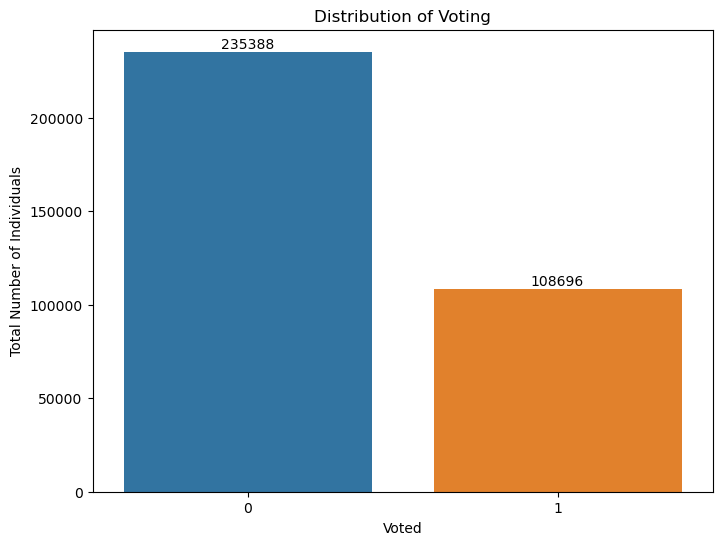

In [70]:
# Count the number of votes and non-votes
vote_counts = data['voted'].value_counts()

# Plotting the distribution of 'voted'
plt.figure(figsize=(8, 6))
sns.barplot(x=vote_counts.index, y=vote_counts.values)
plt.title('Distribution of Voting')
plt.xlabel('Voted')
plt.ylabel('Total Number of Individuals')

# Adding labels to show the total number
for index, value in enumerate(vote_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [30]:
# Calculate proportion of voters vs. non-voters

total_individuals = data['voted'].count()
proportions = vote_counts / total_individuals * 100

print(proportions)

0    68.410039
1    31.589961
Name: voted, dtype: float64


This tells us that most of the individuals in our dataset did not vote in the 2006 primary election (68.4%) compared to 31.6% that did. This has important implications for our modelling approaches as it tells us that the baseline accuracy (i.e. the accuracy we would get from a model that always predicts the majority class) of a classification model is 68.4%. Next, it would also be useful to examine the proportion of treated vs. untreated individuals and the proportion of individuals that received each treatment.

#### Treatment

findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans.


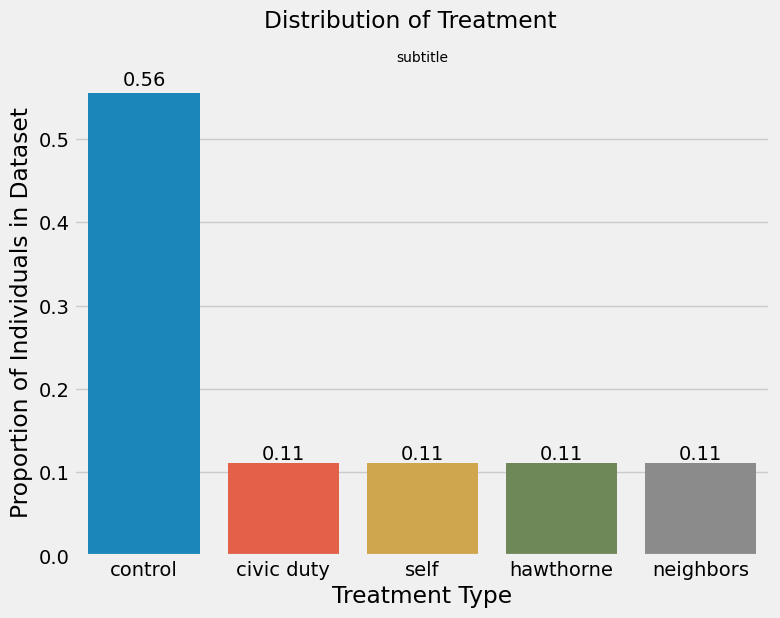

In [65]:
# calculate treatment counts
treatment_counts = data['treatment'].value_counts(normalize=True)

# Plotting the distribution of 'treatment'
plt.figure(figsize=(8, 6))
sns.barplot(x=treatment_counts.index, y=treatment_counts.values)
plt.suptitle('Distribution of Treatment')
plt.title('subtitle', fontsize=10)
plt.xlabel('Treatment Type')
plt.ylabel('Proportion of Individuals in Dataset')

# Adding labels to show the total number
for index, value in enumerate(treatment_counts.values):
    plt.text(index, round(value, 2), str(round(value, 2)), ha='center', va='bottom')

plt.show()

From the graph above, we can see that roughly 56% of individuals in our dataset have been allocated to the control group. Amongst the remaining 44%, individuals are divided evenly between the 4 treatment groups. The main objective of our analysis is to find out whether our treatments (mailings that exert social pressure on individuals to vote). To do this, it would be useful to examine the distribution of various characteristics of individuals in our dataset. We can start by looking at the distribution of ages in our dataset.

#### Age

In [40]:
# create age column 

data['age'] = 2006 - data['yob']

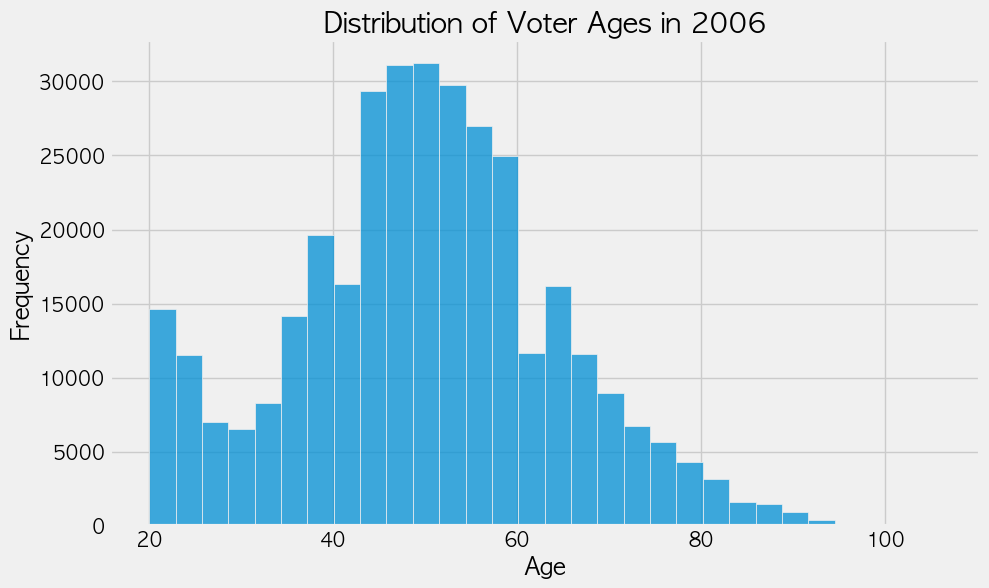

In [61]:
# plot distribution of ages

plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30) 
plt.title('Distribution of Voter Ages in 2006')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [28]:
# descriptive statistics for age 

data['age'].describe()

count    344084.000000
mean         49.786346
std          14.449093
min          20.000000
25%          41.000000
50%          50.000000
75%          59.000000
max         106.000000
Name: age, dtype: float64

The average age of individuals in our dataset is approximately 50 years. This suggests that the dataset tends towards a middle-aged demographic on average. However, the standard deviation is about 14.45 years, which measures the dispersion or variability of age values around the mean. This indicates a moderate spread of ages, suggesting that the population's age varies fairly widely around the mean. The median is 50 years. The relative closeness of our median and mean ages suggest that this age distribution is fairly symmetric around the central value. 

#### Gender

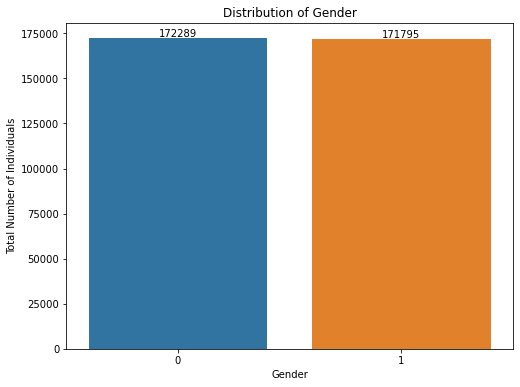

In [29]:
# Count the number of males and females
gender = data['sex'].value_counts()

# Plotting the distribution of 'voted'
plt.figure(figsize=(8, 6))
sns.barplot(x=gender.index, y=gender.values)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Total Number of Individuals')

# Adding labels to show the total number
for index, value in enumerate(gender.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

The distribution of gender is fairly equal which is to be expected. There are 172289 males and 171793 females. It would also be useful to examine other demographic characteristics like income, employment, education and race. I do this by creating a function to calculate summary statistics and generate a histogram plot. 

In [30]:
# Define function to summarise and plot

def summarise_and_plot(df, column_name):
    """
    Calculate summary statistics and generate a histogram plot for a given column in a DataFrame.
    
    Parameters:
    - df: pandas DataFrame containing the data.
    - column_name: The name of the column to summarize and plot.
    
    Returns:
    - A summary statistics of the specified column and a histogram plot.
    """
    # Ensure the column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame")
    
    # Calculate summary statistics
    summary_stats = df[column_name].describe()
    
    # Print summary statistics
    print(f"Summary Statistics for {column_name}:")
    print(summary_stats)
    
    # Generate histogram plot
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], bins=30)  
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

#### Income

Summary Statistics for mean_income:
count    344084.000000
mean      74443.438320
std       23424.056866
min       34865.000000
25%       58629.000000
50%       69638.000000
75%       84033.000000
max      175372.000000
Name: mean_income, dtype: float64


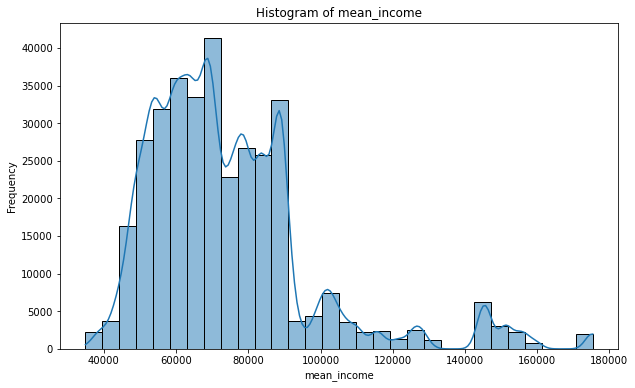

In [31]:
summarise_and_plot(data, 'mean_income')

Summary Statistics for median_income:
count    344084.000000
mean      60157.751883
std       18209.525071
min       26155.000000
25%       47126.000000
50%       56042.000000
75%       69656.000000
max      138884.000000
Name: median_income, dtype: float64


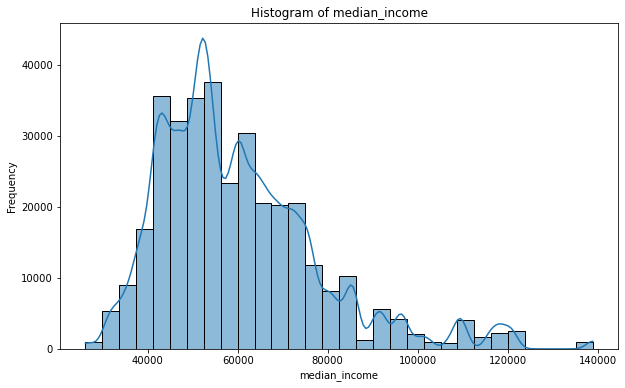

In [32]:
summarise_and_plot(data, 'median_income')

The average (mean) income across all individuals is approximately \\$74,443, with a standard deviation of about \\$23,424. This suggests a moderate level of income variability within the population, indicating that while many individuals earn around the average income, there is a significant number whose incomes are either much higher or much lower, contributing to the spread. 

In contrast, median_income, which might be a more robust indicator of the typical income due to its lesser sensitivity to extreme values, has an average of \\$60,158, a standard deviation of \\$18,210, and spans from \\$26,155 to \\$138,884. Similar to mean_income, the distribution of median_income reveals significant variation but with lower figures, indicating that when considering the midpoint of incomes (rather than the mean, which can be skewed by very high incomes), the typical income is lower. We can conclude that there is a high degree of variability in income/income inequality in our dataset.

#### Employment

Summary Statistics for unemploy_16:
count    344084.000000
mean          9.991141
std           3.204016
min           2.300000
25%           7.800000
50%           9.500000
75%          11.800000
max          28.000000
Name: unemploy_16, dtype: float64


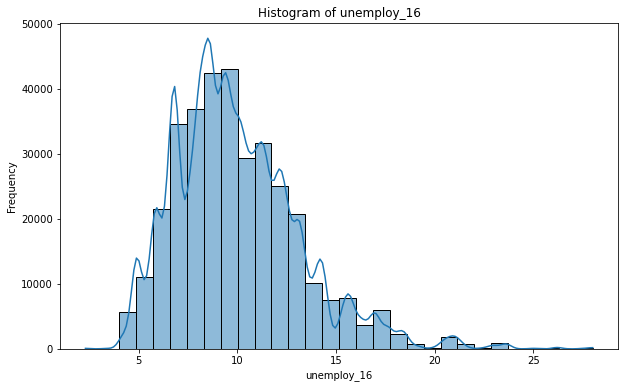

In [33]:
summarise_and_plot(data, 'unemploy_16')

This EDA tells us about the distribution of unemployment for people over the age of 16 in our dataset. The mean unemployment rate is approximately 9.99%, indicating that on average, around 10% of the eligible workforce is unemployed. The standard deviation of about 3.20 points to a moderate variability in unemployment rates across different observations or regions, suggesting differences in economic conditions or job availability. The median unemployment rate is 9.5%, slightly below the mean, indicating that the distribution is somewhat skewed with a longer tail on the right, where higher unemployment rates pull the mean upwards.

#### Education

Summary Statistics for bach_orhigher:
count    344084.000000
mean         29.125932
std          14.396799
min           2.300000
25%          17.800000
50%          27.400000
75%          36.500000
max          77.000000
Name: bach_orhigher, dtype: float64


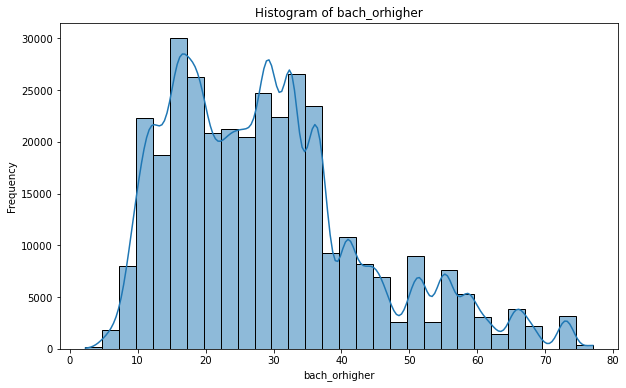

In [34]:
summarise_and_plot(data, 'bach_orhigher')

The mean value of approximately 29.13% indicates that, on average, about a third of the population in these areas holds a bachelor's degree or higher. The standard deviation of about 14.40 points to a significant variability in the proportion of individuals with higher education across different areas, highlighting disparities in educational attainment. The range of values, from a minimum of 2.3% to a maximum of 77%, further underscores this point, revealing that some regions have very low rates of higher education while others are quite high. Overall, these statistics paint a picture of diverse educational backgrounds across the dataset, with a substantial portion of the population achieving higher education, albeit unevenly distributed.

#### Race

Summary Statistics for percent_white:
count    344084.000000
mean         92.494687
std           7.996481
min          36.000000
25%          89.100000
50%          95.700000
75%          97.800000
max         100.000000
Name: percent_white, dtype: float64


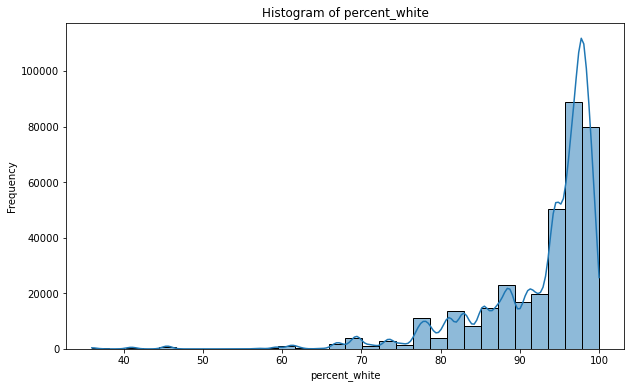

In [35]:
summarise_and_plot(data, 'percent_white')

Summary Statistics for percent_black:
count    344084.000000
mean          4.276082
std           6.062922
min           0.000000
25%           1.000000
50%           2.200000
75%           5.200000
max          64.200000
Name: percent_black, dtype: float64


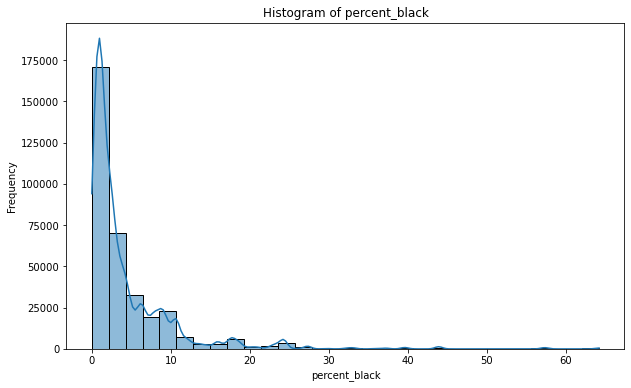

In [36]:
summarise_and_plot(data, 'percent_black')

Summary Statistics for percent_hispanicorlatino:
count    344084.000000
mean          3.768988
std           3.998005
min           0.000000
25%           1.700000
50%           2.600000
75%           4.100000
max          37.600000
Name: percent_hispanicorlatino, dtype: float64


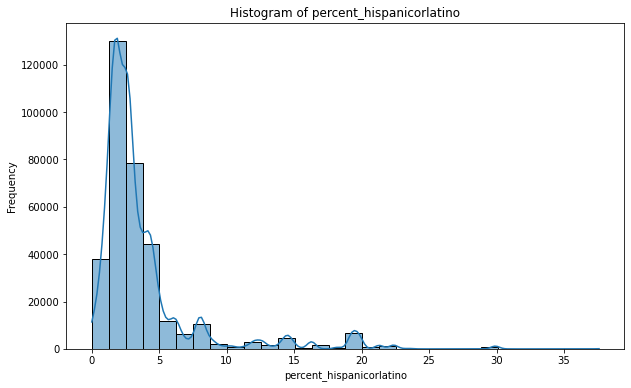

In [37]:
summarise_and_plot(data, 'percent_hispanicorlatino')

The summary statistics for percent_white, percent_black, and percent_hispanicorlatino reveal a dataset with a significant majority of white individuals, on average 92.49%, with a relatively small standard deviation of 7.99%, indicating that this majority is consistent across the dataset. The minimum percentage of white individuals in any area is 36%, with 75% of areas having at least 89.1% white individuals, peaking at 100% in some areas. In contrast, the average percentages of black and Hispanic or Latino individuals are much lower, at 4.28% and 3.77% respectively, with both displaying higher variability (standard deviations of 6.06% and 3.998% respectively) and a range extending to a maximum of 64.2% for black individuals and 37.6% for Hispanic or Latino individuals. However, the high maximum values for black and Hispanic/Latino populations indicate the presence of racial/ethnic enclaves.

### Bivariate Analysis

Having explored our columns of interest individually, we can move on to exploring relationships between our variables. We are particularly interested in variables that are highly correlated with our outcome variable (`voted`). We start with creating a correlation matrix. 

In [38]:
# trim dataframe to make a cleaner correlation matrix 

data_trim = data[['voted', 'sex', 'age', 'g2000', 'g2002', 'p2000', 'p2004', 'hh_size', 'percent_white', 'median_income', 'unemploy_16', 'bach_orhigher']]

In [39]:
# correlation matrix 

data_trim.corr()

,voted,sex,age,g2000,g2002,p2000,p2004,hh_size,percent_white,median_income,unemploy_16,bach_orhigher
voted,1.000000,-0.012903,0.131184,0.077160,0.139352,0.120073,0.162803,-0.051870,0.005057,-0.028155,0.021286,-0.034259
sex,-0.012903,1.000000,-0.032534,0.010933,-0.011685,-0.009265,-0.002263,-0.017426,-0.001390,-0.004806,0.000249,-0.001859
age,0.131184,-0.032534,1.000000,0.359836,0.313495,0.154585,0.051071,-0.310234,0.048665,-0.116720,0.097948,-0.111021
g2000,0.077160,0.010933,0.359836,1.000000,0.404395,0.174615,0.047546,-0.229529,-0.016609,-0.007849,0.000194,0.005967
g2002,0.139352,-0.011685,0.313495,0.404395,1.000000,0.112304,0.065700,-0.201330,-0.008982,0.007587,0.003375,0.006275
p2000,0.120073,-0.009265,0.154585,0.174615,0.112304,1.000000,0.024725,-0.068972,0.059658,-0.097492,0.057399,-0.107685
p2004,0.162803,-0.002263,0.051071,0.047546,0.065700,0.024725,1.000000,-0.074832,0.039339,-0.103275,0.062490,-0.091008
hh_size,-0.051870,-0.017426,-0.310234,-0.229529,-0.201330,-0.068972,-0.074832,1.000000,-0.016793,0.053230,-0.050896,0.047709
percent_white,0.005057,-0.001390,0.048665,-0.016609,-0.008982,0.059658,0.039339,-0.016793,1.000000,-0.021774,-0.056262,-0.285208
median_income,-0.028155,-0.004806,-0.116720,-0.007849,0.007587,-0.097492,-0.103275,0.053230,-0.021774,1.000000,-0.542558,0.772652


In [40]:
# Find pairs of variables with correlation coefficient greater than |0.3|
corr_matrix = data_trim.corr()
high_corr_features = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.3:
            high_corr_features.append((corr_matrix.columns[i], 
                                       corr_matrix.columns[j], 
                                       corr_matrix.iloc[i, j]))
            
print(high_corr_features)

[('age', 'g2000', 0.3598355260997854), ('age', 'g2002', 0.313495323074313), ('age', 'hh_size', -0.3102338645030548), ('g2000', 'g2002', 0.4043945549125059), ('median_income', 'unemploy_16', -0.5425584397074115), ('median_income', 'bach_orhigher', 0.7726516973658797), ('unemploy_16', 'bach_orhigher', -0.5895361465256428)]


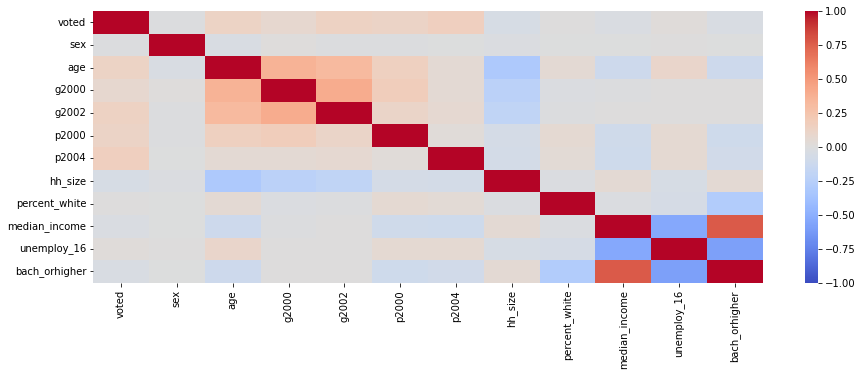

In [41]:
# correlation heatmap 

plt.figure(figsize=(15, 5))
sns.heatmap(data_trim.corr(), cmap="coolwarm", vmax=1.0, vmin=-1.0)
plt.show()

**(age, g2000, 0.3598372562084349) and (age, g2002, 0.3134971619127104)**: These correlations suggest that older individuals are more likely to have voted in the 2000 and 2002 general elections, respectively. This could be due to various factors, including a higher propensity for political engagement among older populations or a higher likelihood of being registered to vote.

**(age, hh_size, -0.31024027920216196)**: This negative correlation indicates that as age increases, household size tends to decrease. This trend could reflect life cycle patterns, where younger people may live in larger households (with parents or roommates) and older individuals may live alone or with fewer people (e.g., after children have moved out).

**(g2000, g2002, 0.40439383668588125)**: This positive correlation between voting in the 2000 and 2002 elections indicates that individuals who voted in one are likely to have voted in the other. This pattern might reflect consistent voting behavior among certain individuals who regularly participate in elections.

**(median_income, unemploy_16, -0.5425586830461718)**: The negative correlation suggests that higher median incomes within areas are associated with lower unemployment rates among those aged 16 and over. Higher income levels may indicate more prosperous areas with better job opportunities, thereby reducing unemployment rates.

**(median_income, bach_orhigher, 0.7726515726972278)**: This strong positive correlation implies that areas with higher median incomes tend to have a higher percentage of individuals with a bachelor's degree or higher. This could be because higher education often leads to higher-paying jobs, raising the median income in areas with a more educated populace.

**(unemploy_16, bach_orhigher, -0.5895362978414644)**: The negative correlation indicates that higher unemployment rates among those aged 16 and over are associated with lower percentages of individuals with a bachelor's degree or higher. This relationship might stem from the fact that higher education levels generally improve employability and job stability, thus reducing unemployment rates.

#### Relationship between treatments and voting 

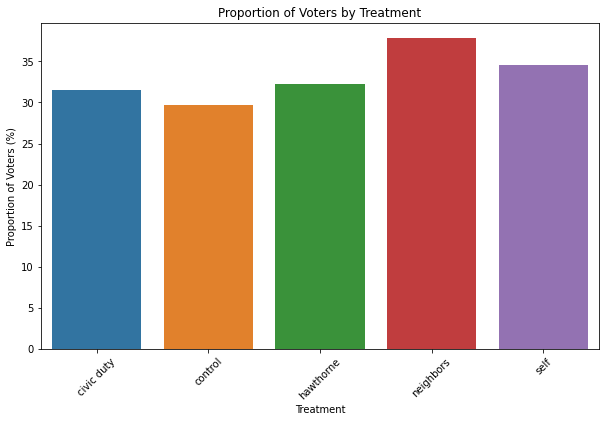

In [42]:
# calculate proportion of voters for each treatment
voter_proportions = data.groupby('treatment')['voted'].value_counts(normalize=True).unstack() * 100

# reset index
voter_proportions.reset_index(inplace=True)

# plot the bar graph 
plt.figure(figsize=(10, 6))
sns.barplot(data=voter_proportions, x='treatment', y=1)  # Assuming '1' represents voters in the 'voted' column
plt.title('Proportion of Voters by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Proportion of Voters (%)')
plt.xticks(rotation=45)  # Rotate treatment labels for better readability
plt.show()


This graph tells us that there seem to be observable differences between treatment and control groups in terms of proportions of people in each group that voted. Neighbours seems to have had the highest effect, followed by self, hawthorne and civic duty. However, we cannot conclude that we have observed a positive treatment effect as there could be other confounding factors influencing these outcomes.

#### Relationship between age and voting 

In [43]:
# Create function to analyse relationship between voting and a numerical column

def analyse_voting_correlation(df, vote_column, numerical_column):
    """
    Calculate the correlation between a voting column and a numerical column,
    perform a statistical test, and generate a violin plot for the distributions
    of the numerical column for voters and non-voters.

    Parameters:
    - df: pandas DataFrame containing the data.
    - vote_column: The name of the column indicating if someone voted (1) or not (0).
    - numerical_column: The name of the numerical column to analyze.
    """
    # Ensure the input column is numeric for correlation calculation
    if not pd.api.types.is_numeric_dtype(df[numerical_column]):
        raise ValueError(f"The column '{numerical_column}' must be numeric.")

    # Calculate point-biserial correlation
    correlation, p_value_corr = stats.pointbiserialr(df[vote_column], df[numerical_column])
    
    print(f"Correlation between 'voted' and '{numerical_column}': {correlation:.3f}")
    print(f"P-value for correlation significance: {p_value_corr:.4f}")
    
    # Perform t-test between voters and non-voters for the numerical column
    group1 = df[df[vote_column] == 1][numerical_column]
    group2 = df[df[vote_column] == 0][numerical_column]
    t_stat, p_value_ttest = stats.ttest_ind(group1, group2)
    
    print(f"T-test statistic: {t_stat:.3f}, P-value: {p_value_ttest:.4f}")

    # Generate violin plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=df[vote_column], y=df[numerical_column])
    plt.title(f"Distribution of '{numerical_column}' for Voters and Non-Voters")
    plt.xlabel('Voted')
    plt.ylabel(numerical_column)
    plt.xticks(ticks=[0, 1], labels=['Non-Voters', 'Voters'])
    plt.show()

Correlation between 'voted' and 'age': 0.131
P-value for correlation significance: 0.0000
T-test statistic: 77.621, P-value: 0.0000


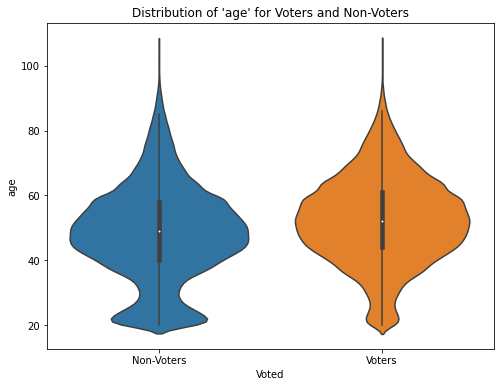

In [44]:
# age distribution of voters vs. non-voters

analyse_voting_correlation(data, 'voted', 'age')

The correlation coefficient of 0.131 indicates a slight positive relationship between age and the likelihood of voting; as age increases, so does the likelihood of voting, albeit not strongly. The p-value for this correlation is 0.0000, which suggests that the correlation is statistically significant despite being weak.

The violin plot tells us that voters tend to be older than non-voters, on average. 

#### Relationship between income and voting

Correlation between 'voted' and 'median_income': -0.028
P-value for correlation significance: 0.0000
T-test statistic: -16.522, P-value: 0.0000


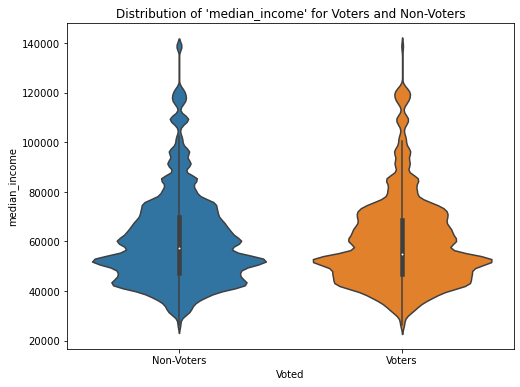

In [45]:
# income distribution of voters vs. non-voters

analyse_voting_correlation(data, 'voted', 'median_income')

The correlation statistic provided is -0.028 with a p-value of 0.0000, indicating a very slight negative correlation between median income and the likelihood of voting, which is statistically significant due to the p-value. This means that as median income slightly decreases, the likelihood of voting might increase, or vice versa, but the effect size is very small.

From the violin plot, we can observe the distribution shapes for both voters and non-voters. Both distributions show a wide range of incomes with a similar overall shape, although the plot for voters (orange) seems slightly wider at lower income levels, suggesting a larger variability in income among voters. The width of the plot for non-voters (blue) appears to be more consistent across different income levels, which might suggest that non-voters have a more homogeneous income distribution compared to voters.

Overall, there seems to be only a very slight relationship between income and voting behaviour. 

#### Race and voting

Correlation between 'voted' and 'percent_white': 0.005
P-value for correlation significance: 0.0030
T-test statistic: 2.966, P-value: 0.0030


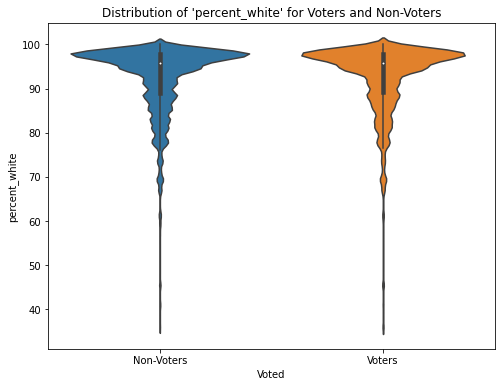

In [46]:
# race and voting

analyse_voting_correlation(data, 'voted', 'percent_white')

The correlation values and violin plots show almost no relationship between race and voting behaviour. 

#### Education and voting

Correlation between 'voted' and 'bach_orhigher': -0.034
P-value for correlation significance: 0.0000
T-test statistic: -20.107, P-value: 0.0000


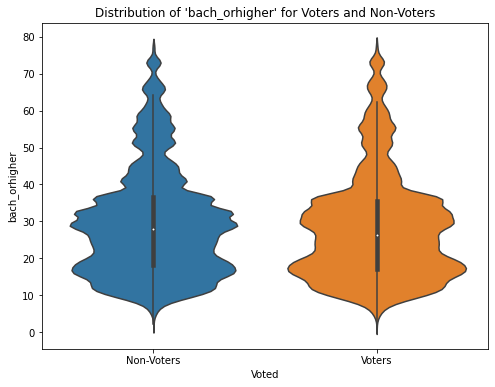

In [47]:
analyse_voting_correlation(data, 'voted', 'bach_orhigher')

A slight negative correlation of -0.034 between 'bach_orhigher' and 'voted', with a p-value of 0.0000, suggests a very weak inverse relationship between the level of education and voting, with higher education levels being marginally less associated with voting. However, this correlation is very small and, while statistically significant, may not be practically meaningful.

#### Previous voting behaviour and voting

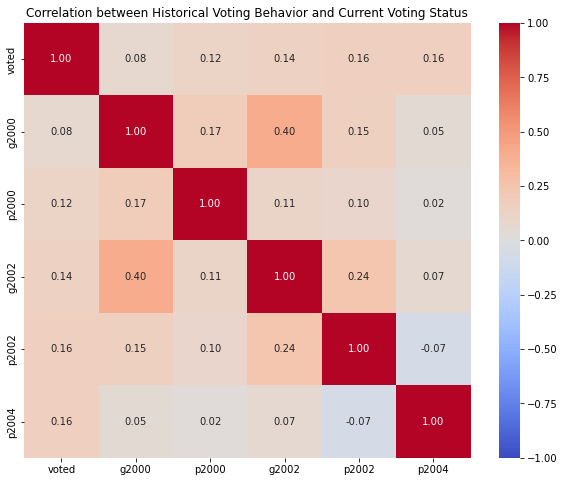

In [48]:
# select columns related to voting

voting_columns = ['voted', 'g2000', 'p2000', 'g2002', 'p2002', 'p2004']  
voting_data = data[voting_columns]

# Calculate the correlation matrix
correlation_matrix = voting_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmax=1.0, vmin=-1.0)
plt.title('Correlation between Historical Voting Behavior and Current Voting Status')
plt.show()

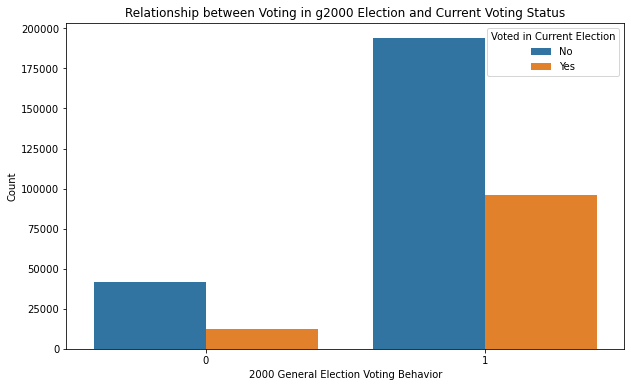

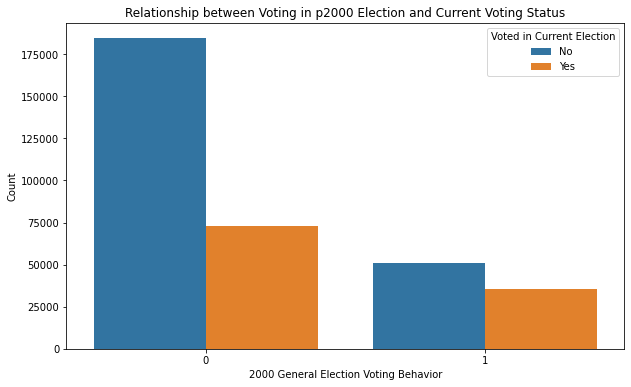

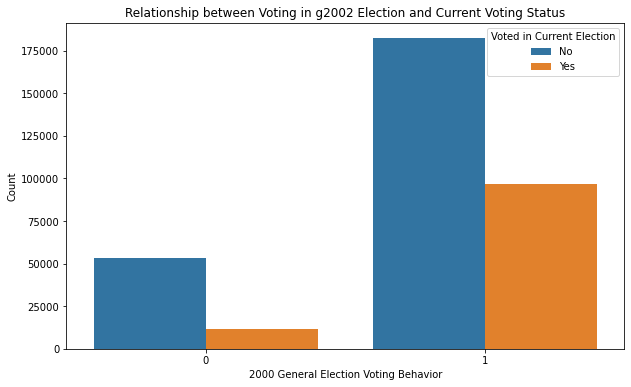

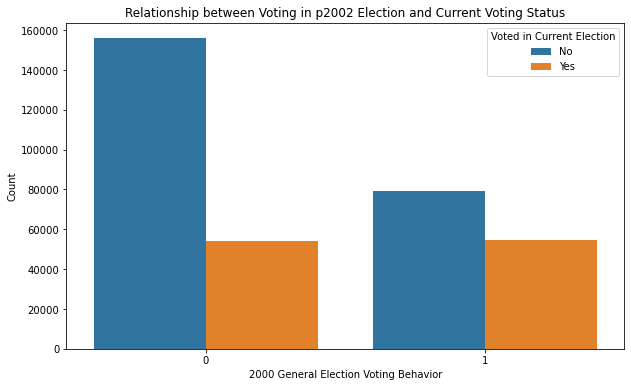

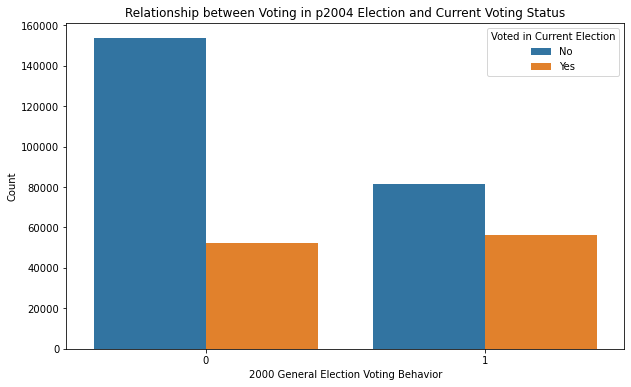

In [49]:
# plot bar graphs for each election
for i in voting_columns[1:]: 
    plt.figure(figsize=(10, 6))
    sns.countplot(x=i, hue='voted', data=data)
    plt.title(f'Relationship between Voting in {i} Election and Current Voting Status')
    plt.xlabel('2000 General Election Voting Behavior')
    plt.ylabel('Count')
    plt.legend(title='Voted in Current Election', labels=['No', 'Yes'])
    plt.show()

It seems that there is a generally strong correlation between voting behaviors over time, particularly between g2000 and g2002, suggesting a consistency in voting patterns among individuals across these two general elections. It also seems that those who voted in past general elections (g2000, g2002) are slightly more likely to vote in the current period (voted), as indicated by correlation values of 0.08 and 0.14, respectively, though these are relatively weak correlations.

Interestingly, the correlation between voting in primary elections (p2000, p2002, p2004) and current voting status is lower than for general elections, which might imply that voting in general elections is a more consistent predictor of future voting behavior. Primary election voting behaviors (p2000, p2002, p2004) are less correlated with each other and with the current voting status, which could indicate that voting in primaries is influenced by factors that may not apply to general elections, such as the appeal of particular candidates or specific issues at the time.

## Key Findings <a id='key_findings'></a>

- A preliminary analysis shows us that there are differences in the proportion of people who voted between the treatment and control groups. 'Neighbours' has the greatest impact. 

- There seems to be a high degree of variability in income, educational attainment and employment rates within our population. 

- Age seems to be mildly correlated with voting behaviour. Similarly, past voting behaviour (particularly in general elections) seems to give us some indication of current voting behaviour. 

## Next Steps <a id='next_steps'></a>

- Investigate columns in the dataset that are currently unexplained. 
- Pre-process the data (e.g. encode treatment variable).
- Create initial linear models and evaluate results. 

# Appendix  <a id='appendix'></a>

## Other Data Cleaning

#### Household ID (`hh_id`)
The `hh_id` column was formatted such that each entry had 6 characters. For entries that did not have 6 non-whitespace characters, white spaces were added. Therefore, I had to remove the whitespaces to turn the household ID column into an int64 datatype. 

In [50]:
# Strip entries and change datatype
data['hh_id'] = data['hh_id'].str.strip()

# Check for entries that have non-numeric characters

non_numeric_hh_id = data[~data['hh_id'].str.isnumeric()]
display(non_numeric_hh_id)

# Remove these rows from original dataframe
bad_IDs = ['41511B', '43601B']
data = data[~data['hh_id'].isin(bad_IDs)]

,sex,yob,g2000,g2002,g2004,p2000,p2002,p2004,treatment,cluster,voted,votedav,dem,nov,aug,zip,plus4,city,hh_id,hh_size,CityName,totalpopulation_estimate,percent_male,percent_female,median_age,percent_under5years,percent_5to9years,percent_10to14years,percent_15to19years,percent_20to24years,percent_25to34years,percent_35to44years,percent_45to54years,percent_55to59years,percent_60to64years,percent_65to74years,percent_75to84years,percent_85yearsandolder,percent_18yearsandolder,percent_21yearsandover,percent_62yearsandover,percent_65yearsandover,percent_white,percent_black,percent_amindian_alaskan,percent_asian,percent_nativeandother,percent_other_nativeandother,percent_hispanicorlatino,percent_race_other,median_income,mean_income,employ_16,unemploy_16,unemploy_20to64,employ_20to64,employ_rename_20to64,hsorhigher,bach_orhigher,less9thgrade,grade9to12,highschool,somecollege,assoc,bachelors,grad,age
80444,1,1968,1,1,1,1,1,1,civic duty,2307,0,0,0,89,92,48314,3562,45,41511B,1,Sterling Heights,20116,48.5,51.5,40.5,6.2,7.5,6.1,6.5,5.4,11.3,14.5,15.1,7.8,5.2,7.4,4.2,2.6,76.0,72.5,16.7,14.3,86.9,2.5,1.0,10.3,0.0,0.1,3.7,0.4,58719,73921,60.0,8.0,7.5,74.3,2.7,87.0,29.2,4.5,8.5,26.5,22.1,9.3,18.3,10.9,38
84131,1,1958,1,1,1,0,0,1,hawthorne,2423,1,0,0,89,65,48317,4102,1,43601B,1,Utica,26507,51.9,48.1,34.7,6.4,6.9,6.7,6.7,6.6,17.3,13.7,13.5,6.6,5.3,5.2,4.1,1.1,76.3,72.1,14.0,10.4,92.1,5.6,1.0,2.9,0.0,0.1,4.2,1.5,51262,63856,60.7,11.1,10.6,71.2,2.4,90.7,23.0,3.1,6.3,32.7,25.9,9.1,16.4,6.6,48


In [51]:
# Convert hh_id column to int datatype
data['hh_id'] = data['hh_id'].astype(int)

### Unknown Columns  <a id='unknown_columns'></a>

When building my data dictionary, I started by trying to identify which columns I do not currently understand and attempting to infer their content using the rest of the data. Currently, these columns are `dem`, `nov`, `aug`, `plus4`, and `employ_rename_20to64`. 

My first guesses are that `dem` refers to a probability of each individual voting Democratic. This is because the study details mention that households for which all individuals had a higher than 60% probability of voting Democratic were excluded from the study. `nov` and `aug` presumably refer to election months but I am unsure how to interpret the numbers included in these columns. `plus4` and `employ_rename_20to64` are columns for which I have no good guesses. 

We can try to infer the meaning of these columns by writing a function to generate the number of unique values, value counts, a statistical summary and a histogram.

dem unique values:
[ 43   1   0   6   9  17  38  16  18  49  13  75  47   8  19  45   3  48
  27   4  66  23   2  56  15  53  59  55  36  39  41  12  52  78  57  32
  54  37  34  30  29  72   5   7  31  28  14  24  44  46  10  58  40  60
  25  26  11  33  50  20  71  77  21  51  35  42  63  22  65  80  85  88
  62  64  81  74  79  97  61  67  70  76  94  86  82  68  73  93  84  69
  89  92  96  91  87  83  95  90  98  99 100]

dem value counts (top 5):
0    41768
1    25357
2    16604
3    13045
4    10630
Name: dem, dtype: int64

dem statistical summary:
count    344082.000000
mean         21.833822
std          20.446227
min           0.000000
25%           3.000000
50%          16.000000
75%          39.000000
max         100.000000
Name: dem, dtype: float64



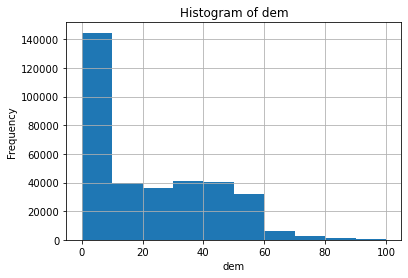

--------------------------------------------------
nov unique values:
[ 70  99  86  89  75  82  91  62  52  92  88  20  29  45  93  90  40  73
  43  50  94  87  98  35  51  96  84  83  95  79  48  63  85  33  77  61
   9  54  80  67  60  26  97  65  72  74  58  78  76  68  55  46  56  81
  18  38  59  44 100  42  41  69  71  64  47  30  39  37  66  36  22  57
  28  53  21  34  25  27  49  24  31  19  23   8  10  32  17   5  15   3
  13  12  11  14   6   4   7]

nov value counts (top 5):
99    36609
89    27451
98    23949
94    20117
91    19772
Name: nov, dtype: int64

nov statistical summary:
count    344082.000000
mean         84.109026
std          18.718084
min           3.000000
25%          83.000000
50%          90.000000
75%          96.000000
max         100.000000
Name: nov, dtype: float64



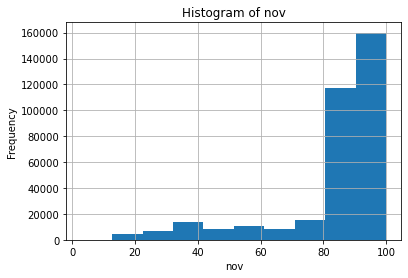

--------------------------------------------------
aug unique values:
[ 72  99  29  30   2  62  50  93  51   3  32  16  14  53   1  42  71  40
  92  38   8  10  22   7  69  70  35  41  31  78   5  43  26  60  12  67
  37  20  65  33  80  11  89   4  44  77  63  68   9  59  61  52  73  75
  27  79  19  64  57  91  87  76  36  34  46  54  85  90   6  48  58  47
  45  28  55  15  39  98  97  17  56  94  86  81  66  49  24  88   0  82
  74  25  21  95  13  96  23  83  18  84 100]

aug value counts (top 5):
1     14109
2      8151
30     6226
31     6221
33     5880
Name: aug, dtype: int64

aug statistical summary:
count    344082.000000
mean         47.831281
std          27.569985
min           0.000000
25%          30.000000
50%          48.000000
75%          70.000000
max         100.000000
Name: aug, dtype: float64



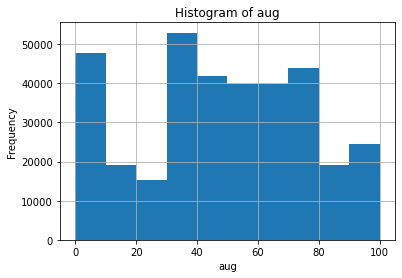

--------------------------------------------------
plus4 unique values:
[1022 4131 3002 ... 7080 7897 8070]

plus4 value counts (top 5):
9721    522
9710    494
9722    490
9713    472
9714    462
Name: plus4, dtype: int64

plus4 statistical summary:
count    344082.000000
mean       6471.760883
std        3209.271473
min          30.000000
25%        3176.000000
50%        8279.000000
75%        9428.000000
max        9889.000000
Name: plus4, dtype: float64



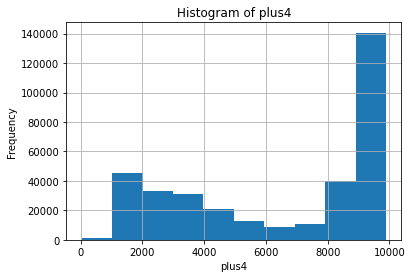

--------------------------------------------------
employ_rename_20to64 unique values:
[ 3.5  5.9  5.   4.4  3.6  2.1  3.   5.2  2.2  3.2  6.2  9.7  3.7  2.3
  2.6  1.7  4.6  4.3  2.4  1.5  2.7  2.   5.1  7.8  5.5  1.9  4.   1.8
  2.5  2.9  3.3  6.   6.6  1.3  2.8  5.3  5.6  3.9  4.5  3.1  6.8  1.6
  4.7  4.1  3.8  5.7  4.8  9.2  6.9  6.5  6.3  6.7  5.4  4.2  5.8  7.3
  3.4  7.5 10.3  8.5  7.2  8.2  4.9  6.4  6.1  7.6  7.4  7.1  8.4 10.1
  7.   7.7 11.  10.9  8.7 10.5  8.1  8.8  7.9  9.5  8.6  9.1  9.8  8.
  9.  10. ]

employ_rename_20to64 value counts (top 5):
2.4    26062
2.2    22501
2.1    21690
2.3    20649
1.9    18402
Name: employ_rename_20to64, dtype: int64

employ_rename_20to64 statistical summary:
count    344082.000000
mean          3.044940
std           1.297269
min           1.300000
25%           2.200000
50%           2.600000
75%           3.500000
max          11.000000
Name: employ_rename_20to64, dtype: float64



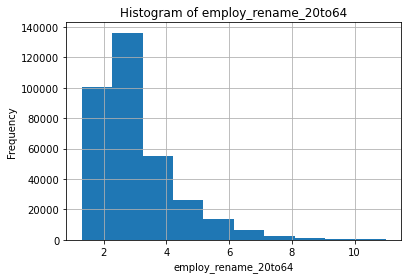

--------------------------------------------------


In [52]:
def explore_columns(data, columns):
    for col in columns:
        # Display unique values
        print(f"{col} unique values:\n{data[col].unique()}\n")
        
        # Value counts
        print(f"{col} value counts (top 5):\n{data[col].value_counts().head()}\n")
        
        # Statistical summary
        print(f"{col} statistical summary:\n{data[col].describe()}\n")
        
        # Histogram
        data[col].hist()
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()
        
        # Line to separate outputs for readability
        print("-" * 50)
        
# Run function 
columns_to_explore = ['dem', 'nov', 'aug', 'plus4', 'employ_rename_20to64']
explore_columns(data, columns_to_explore)

Given this output, I have some further guesses about the meaning of `nov` and `aug`. Since these both have a max value of 100 and min value of 0, they may be probabilities of voting in november and august, respectively. The paper details mention that households for which all individuals had over a 60% probability of voting by absentee ballot were excluded from the analysis as they would have decided to vote before the mailings were sent out. Presumably, August is when individuals who decide to cast an absentee vote do so. This makes sense as `nov` is heavily skewed left, which would be the case if absentee voters were systematically excluded from the dataset. 

I am still unsure about `plus4` and `employ_rename_20to64`. 

### Calculating Weighted Averages  <a id='weighted_averages'></a>

Another approach to calculating summary statistics for the population could involve creating a weighted average of ZIP code-level characteristics. The following code takes some preliminary steps to do this. 

In [53]:
# calculate number of individuals in dataset per ZIP code

people_per_zip = data['zip'].value_counts()
print(people_per_zip)

49426    4233
49341    3606
49428    3395
48154    3178
49424    3026
         ... 
49638      43
49736      42
48761      40
48635      37
49799      16
Name: zip, Length: 693, dtype: int64


In [54]:
# separate demographics for each ZIP code
zip_demographics = data.drop_duplicates(subset='zip').reset_index(drop=True)

# add column for number of people in dataset
zip_demographics['num_in_ds'] = zip_demographics['zip'].map(people_per_zip)

# drop unnecessary columns 
zip_demographics.drop(columns = ['sex', 'yob', 'g2000', 'g2002', 'g2004', 'p2000', 'p2002', 'p2004', 
                                 'treatment', 'cluster', 'voted', 'votedav', 'dem', 'nov', 'aug', 
                                'plus4', 'city', 'hh_id', 'hh_size', 'CityName', 'age'], inplace=True)

display(zip_demographics)

,zip,totalpopulation_estimate,percent_male,percent_female,median_age,percent_under5years,percent_5to9years,percent_10to14years,percent_15to19years,percent_20to24years,percent_25to34years,percent_35to44years,percent_45to54years,percent_55to59years,percent_60to64years,percent_65to74years,percent_75to84years,percent_85yearsandolder,percent_18yearsandolder,percent_21yearsandover,percent_62yearsandover,percent_65yearsandover,percent_white,percent_black,percent_amindian_alaskan,percent_asian,percent_nativeandother,percent_other_nativeandother,percent_hispanicorlatino,percent_race_other,median_income,mean_income,employ_16,unemploy_16,unemploy_20to64,employ_20to64,employ_rename_20to64,hsorhigher,bach_orhigher,less9thgrade,grade9to12,highschool,somecollege,assoc,bachelors,grad,num_in_ds
0,48001,12192,50.1,49.9,45.4,5.3,4.2,6.8,5.3,6.5,10.3,10.8,18.9,7.4,8.9,9.6,4.6,1.3,80.1,76.6,20.6,15.5,98.8,0.0,0.4,0.5,0.0,0.2,1.5,0.6,48081,58309,48.3,16.2,15.8,59.6,3.5,87.8,16.0,2.2,10.1,37.2,27.7,6.8,9.8,6.2,571
1,48002,3297,50.5,49.5,40.2,5.0,8.7,7.6,6.6,5.2,10.0,15.2,17.7,5.4,6.5,6.5,4.1,1.5,74.6,70.4,16.2,12.1,98.5,0.5,0.0,0.7,0.0,0.8,3.2,0.8,63693,72338,61.0,8.9,8.3,74.5,5.9,87.7,7.8,5.7,6.6,33.2,32.8,13.9,5.5,2.3,199
2,48003,5951,47.4,52.6,39.4,4.5,8.0,8.2,8.9,4.9,9.3,16.1,18.3,6.3,5.6,5.5,4.0,0.5,72.9,69.7,13.3,10.0,97.3,0.8,0.1,2.0,0.0,0.4,2.3,1.5,63538,70648,57.9,14.0,13.3,69.7,5.0,92.8,20.8,2.0,5.2,38.2,24.7,9.0,12.9,8.0,290
3,48005,5404,47.8,52.2,43.1,2.8,5.4,9.1,6.5,5.8,9.7,13.1,19.5,8.5,6.0,6.8,5.4,1.3,78.0,74.8,16.9,13.5,99.6,0.3,0.8,0.0,0.0,0.5,1.4,0.4,72157,79639,59.9,11.4,9.2,72.0,4.4,87.5,15.5,4.8,7.7,31.9,29.4,10.8,10.4,5.1,551
4,48006,3932,52.1,47.9,41.3,5.7,8.1,7.5,7.0,4.0,8.4,14.8,18.8,8.0,4.8,8.5,3.2,1.3,74.3,70.7,16.1,13.0,99.0,0.1,0.5,0.4,0.0,0.6,1.3,0.7,54707,63811,53.3,13.6,12.8,63.0,3.6,88.7,11.5,2.6,8.8,41.6,26.8,8.8,7.6,3.9,273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,49781,4368,50.0,50.0,43.0,3.3,6.5,7.1,6.6,5.1,10.9,12.6,17.8,7.1,7.0,6.3,6.9,2.8,78.5,74.4,18.9,16.0,71.0,1.9,34.3,0.3,0.0,0.6,0.9,0.6,38750,49919,52.6,17.6,16.1,67.2,3.9,88.6,18.0,3.0,8.4,41.8,21.6,7.3,13.2,4.8,105
689,49783,19981,50.7,49.3,36.5,5.2,5.6,6.1,9.6,8.3,12.8,12.9,13.8,6.6,4.9,7.4,5.1,1.6,79.1,71.3,17.3,14.1,79.9,1.9,21.1,1.1,0.1,0.1,1.6,0.5,40504,55283,54.8,12.7,11.0,67.6,2.7,88.1,22.1,2.3,9.6,32.8,26.4,6.8,13.9,8.2,287
690,49788,6567,76.7,23.3,34.6,6.2,3.7,4.1,5.4,8.5,22.8,21.8,15.8,6.2,2.1,1.9,0.9,0.6,82.9,78.5,4.4,3.4,57.1,26.1,20.6,1.9,0.2,0.4,4.3,4.2,29036,38098,18.8,28.0,25.4,19.7,4.5,87.7,5.1,2.1,10.1,49.0,28.4,5.2,3.6,1.5,133
691,49795,2045,51.1,48.9,43.9,5.4,6.7,6.5,6.9,4.6,9.6,11.1,18.5,8.1,4.6,11.1,5.0,1.9,77.2,73.4,20.5,17.9,99.7,0.2,1.3,0.0,0.0,1.2,3.4,1.0,39491,46209,47.9,18.5,18.9,60.4,5.7,82.5,7.5,3.7,13.8,44.3,21.3,9.4,5.4,2.1,94


In [55]:
def calculate_weighted_average(df, percentage_column, population_column):
    """
    Calculate the weighted average for a given percentage column in a DataFrame.
    
    Parameters:
    - df: pandas DataFrame containing the data.
    - percentage_column: The name of the column containing percentage values.
    - population_column: The name of the column containing population counts for weighting.
    
    Returns:
    - The weighted average of the specified percentage column.
    """
    # Ensure percentage values are in decimal form; otherwise, adjust the calculation below.
    weighted_sum = (df[percentage_column] * df[population_column]).sum()
    total_population = df[population_column].sum()
    
    if total_population == 0:
        raise ValueError("Total population is zero, cannot divide by zero")
    
    weighted_average = weighted_sum / total_population
    return weighted_average